In [3]:
#!pip install tensorboard

In [1]:
from IPython.display import Image

`tensorboard --logdir=./pths/logs --host 0.0.0.0`
- 局域网的服务器上执行，终端浏览器通过服务器的局域网ip查看网页日志
    - `--host 0.0.0.0`
- 这个命令行只能在启动训练后执行，否则如果在启动训练前执行，会导致训练代码卡住？

## bascis

- ATen： “A Tensor Library”, inputs/outputs ，http://blog.ezyang.com/2019/05/pytorch-internals/
    - 如下算子（operation）
        - relu
        - add, mul
        - exp
        - randn_like
            - https://pytorch.org/docs/stable/generated/torch.rand_like.html#torch.rand_like
        - sigmoid
        - view
        - linear
            - $y=xA^T+b$
        - ...
- 其他
    - Operation: IO Node
    - Operation: prim::GetAttr, a **primitive** operation used to retrieve an attribute from a Python object or a module. 

In [9]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.tensorboard import SummaryWriter
from torchvision.models import resnet50

In [10]:
# 创建一个 TensorBoard writer
writer = SummaryWriter('runs/model_visualization')

# 创建一个模型
model = resnet50(pretrained=True)

# 创建一个随机数据张量来代表输入数据
inputs = torch.randn(1, 3, 224, 224)

# 将模型和输入添加到 TensorBoard
writer.add_graph(model, inputs)

# 关闭 writer
writer.close()

运行上述代码后，你可以在 TensorBoard 中查看模型的结构。
- 为了启动 TensorBoard，可以在命令行中运行 `tensorboard --logdir=runs`，
    - 然后在浏览器中打开显示的链接。
        - 默认端口号为 `6006` (`http://localhost:6006/`)

In [11]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## graph

- computation graph：DAG，有向无环图计算图；

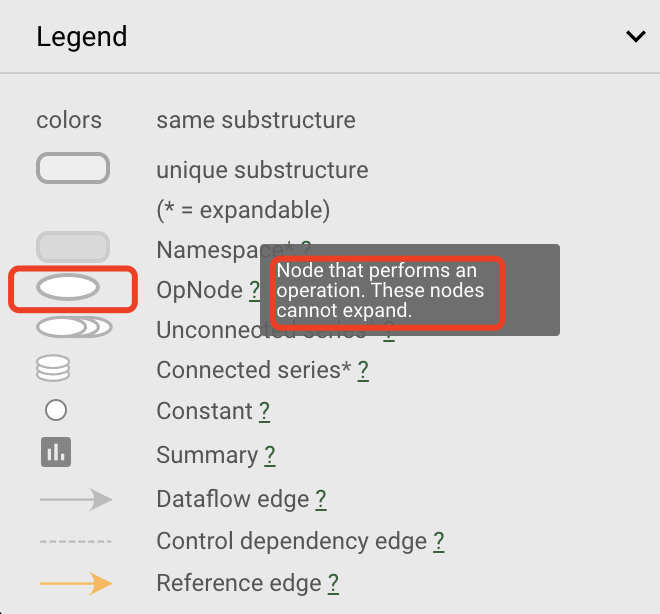

In [13]:
Image('./imgs/graph-legend.png', width=400)

In [12]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        # 28*28 ==> 784
        # fc1 => fc21
        # fc1 => fc22
        self.fc1 = nn.Linear(784, 400)
        
        # mu
        self.fc21 = nn.Linear(400, 20)
        
        # logvar
        self.fc22 = nn.Linear(400, 20)
        
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
    
    # DAG
    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [13]:
writer = SummaryWriter('runs/model_visualization')
vae = VAE()
inputs = torch.randn(1, 28, 28)
writer.add_graph(vae, inputs)

/home/whaow/anaconda3/lib/python3.10/site-packages/torch/jit/_trace.py:1084: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 784 / 784 (100.0%)
Greatest absolute difference: 0.19993644952774048 at index (0, 499) (up to 1e-05 allowed)
Greatest relative difference: 0.35599164221982305 at index (0, 191) (up to 1e-05 allowed)
  _check_trace(


In [14]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


`ssh -L 6006:localhost:6006 server`

## `add_hparams`

In [ ]:
writer = SummaryWriter()

In [ ]:
# writer.add_hparams(vars(args), {'0': 0})